This notebook is generally based on https://github.com/tatsuyah/deep-improvisation.<br>
I changed the dataset, modified some of the data preprocessing methods and plotted the loss function.<br>

## Step 1. Convert MIDI to text 

In [1]:
import os
import midi

In [2]:
# pattern contains a list of tracks
pattern = midi.read_midifile("./midi/original/Intermezzo_in_E-Flat_Minor.mid")
print(pattern)

midi.Pattern(format=0, resolution=384, tracks=\
[midi.Track(\
  [midi.TrackNameEvent(tick=0, text='Intermezzo Op.118/6--J. Lisiecki', data=[73, 110, 116, 101, 114, 109, 101, 122, 122, 111, 32, 79, 112, 46, 49, 49, 56, 47, 54, 45, 45, 74, 46, 32, 76, 105, 115, 105, 101, 99, 107, 105]),
   midi.TextMetaEvent(tick=0, text='2008 e-Piano Junior Competition recital round', data=[50, 48, 48, 56, 32, 101, 45, 80, 105, 97, 110, 111, 32, 74, 117, 110, 105, 111, 114, 32, 67, 111, 109, 112, 101, 116, 105, 116, 105, 111, 110, 32, 114, 101, 99, 105, 116, 97, 108, 32, 114, 111, 117, 110, 100]),
   midi.TextMetaEvent(tick=0, text='recorded July 2008', data=[114, 101, 99, 111, 114, 100, 101, 100, 32, 74, 117, 108, 121, 32, 50, 48, 48, 56]),
   midi.TextMetaEvent(tick=0, text='http://www.piano-e-competition.com/', data=[104, 116, 116, 112, 58, 47, 47, 119, 119, 119, 46, 112, 105, 97, 110, 111, 45, 101, 45, 99, 111, 109, 112, 101, 116, 105, 116, 105, 111, 110, 46, 99, 111, 109, 47]),
   midi.TextMetaEven

In [3]:
chunk_str_list = []

In [4]:

chunk_str = "rs_" + str(pattern.resolution)
chunk_str_list.append(chunk_str)
print(chunk_str_list)

['rs_384']


In [5]:
print(pattern[0])

midi.Track(\
  [midi.TrackNameEvent(tick=0, text='Intermezzo Op.118/6--J. Lisiecki', data=[73, 110, 116, 101, 114, 109, 101, 122, 122, 111, 32, 79, 112, 46, 49, 49, 56, 47, 54, 45, 45, 74, 46, 32, 76, 105, 115, 105, 101, 99, 107, 105]),
   midi.TextMetaEvent(tick=0, text='2008 e-Piano Junior Competition recital round', data=[50, 48, 48, 56, 32, 101, 45, 80, 105, 97, 110, 111, 32, 74, 117, 110, 105, 111, 114, 32, 67, 111, 109, 112, 101, 116, 105, 116, 105, 111, 110, 32, 114, 101, 99, 105, 116, 97, 108, 32, 114, 111, 117, 110, 100]),
   midi.TextMetaEvent(tick=0, text='recorded July 2008', data=[114, 101, 99, 111, 114, 100, 101, 100, 32, 74, 117, 108, 121, 32, 50, 48, 48, 56]),
   midi.TextMetaEvent(tick=0, text='http://www.piano-e-competition.com/', data=[104, 116, 116, 112, 58, 47, 47, 119, 119, 119, 46, 112, 105, 97, 110, 111, 45, 101, 45, 99, 111, 109, 112, 101, 116, 105, 116, 105, 111, 110, 46, 99, 111, 109, 47]),
   midi.TextMetaEvent(tick=0, text='File processed for distribution b

In [6]:

for i, chunk in enumerate(pattern[0]):
#     print(i)
#     print(chunk)

    chunk_str = ""
    
    if (chunk.name == "Note On"):
        chunk_str = chunk_str + str(chunk.tick) + "_" + "no" + "_" + str(chunk.pitch) + "_" + str(chunk.velocity)
        chunk_str_list.append(chunk_str)
        print(chunk_str)
    elif (chunk.name == "Note Off"):
        chunk_str = chunk_str + str(chunk.tick) + "_" + "noff" + "_" + str(chunk.pitch) + "_" + str(chunk.velocity)
        chunk_str_list.append(chunk_str)
        print(chunk_str)
    elif (chunk.name == "Set Tempo"):
        chunk_str = chunk_str + str(chunk.tick) + "_" + "st" + "_" + str(int(chunk.bpm)) + "_" + str(int(chunk.mpqn))
        chunk_str_list.append(chunk_str)
        print(chunk_str)
    elif (chunk.name == "Control Change"):
        chunk_str = chunk_str + str(chunk.tick) + "_" + "cc" + "_" + str(chunk.channel)  + "_" + \
                    str(chunk.data[0]) + "_" + str(chunk.data[1])
        chunk_str_list.append(chunk_str)
        print(chunk_str)

0_st_117_512820
1_cc_0_0_0
0_cc_1_0_0
0_cc_2_0_0
0_cc_3_0_0
0_cc_4_0_0
0_cc_5_0_0
0_cc_6_0_0
0_cc_7_0_0
0_cc_8_0_0
0_cc_9_0_127
0_cc_10_0_0
0_cc_11_0_0
0_cc_12_0_0
0_cc_13_0_0
0_cc_14_0_0
0_cc_15_0_0
1_cc_0_32_0
0_cc_1_32_0
0_cc_2_32_0
0_cc_3_32_0
0_cc_4_32_0
0_cc_5_32_0
0_cc_6_32_0
0_cc_7_32_0
0_cc_8_32_0
0_cc_9_32_0
0_cc_10_32_0
0_cc_11_32_0
0_cc_12_32_0
0_cc_13_32_0
0_cc_14_32_0
0_cc_15_32_0
1_cc_0_7_100
0_cc_1_7_100
0_cc_2_7_100
0_cc_3_7_100
0_cc_4_7_100
0_cc_5_7_100
0_cc_6_7_100
0_cc_7_7_100
0_cc_8_7_100
0_cc_9_7_100
0_cc_10_7_100
0_cc_11_7_100
0_cc_12_7_100
0_cc_13_7_100
0_cc_14_7_100
0_cc_15_7_100
111_cc_0_64_15
112_cc_0_64_31
112_cc_0_64_46
111_cc_0_64_63
112_cc_0_64_77
112_cc_0_64_94
111_cc_0_64_108
112_cc_0_64_127
232_no_78_55
2234_no_77_39
150_noff_78_36
483_no_78_45
99_noff_77_32
382_no_75_52
45_noff_78_56
188_cc_0_64_126
14_cc_0_64_124
15_cc_0_64_123
15_cc_0_64_121
15_cc_0_64_120
15_cc_0_64_118
15_cc_0_64_116
15_cc_0_64_115
14_cc_0_64_115
15_cc_0_64_114
75_no_78_71
6_cc_0_

15_cc_0_64_25
14_cc_0_64_41
15_cc_0_64_52
15_cc_0_64_61
15_cc_0_64_64
15_cc_0_64_66
14_cc_0_64_69
15_noff_63_44
0_cc_0_64_71
15_cc_0_64_73
7_noff_24_41
8_cc_0_64_74
15_cc_0_64_75
15_cc_0_64_76
12_no_36_41
3_cc_0_64_77
128_noff_36_28
58_cc_0_64_76
7_no_65_54
19_no_61_40
18_cc_0_64_76
30_cc_0_64_75
3_cc_0_64_74
15_cc_0_64_72
15_noff_66_27
0_cc_0_64_68
15_cc_0_64_63
15_cc_0_64_59
14_cc_0_64_63
15_cc_0_64_65
15_cc_0_64_66
15_cc_0_64_68
15_cc_0_64_71
2_no_42_49
13_cc_0_64_73
15_cc_0_64_75
14_cc_0_64_75
16_cc_0_64_76
85_noff_42_61
12_no_63_64
3_noff_65_59
10_no_60_45
5_no_48_64
48_noff_61_38
89_cc_0_64_75
29_no_51_71
48_noff_48_32
4_cc_0_64_75
15_cc_0_64_74
31_cc_0_64_74
29_cc_0_64_73
15_cc_0_64_73
15_cc_0_64_72
15_cc_0_64_71
15_cc_0_64_69
14_cc_0_64_68
11_no_61_61
0_no_54_62
4_cc_0_64_65
10_no_58_48
5_cc_0_64_61
7_noff_51_53
7_cc_0_64_56
4_noff_63_62
11_cc_0_64_53
10_noff_60_37
5_cc_0_64_49
15_cc_0_64_45
15_cc_0_64_37
15_cc_0_64_13
14_cc_0_64_0
90_cc_0_64_39
15_cc_0_64_62
14_cc_0_64_65
15_c

15_cc_0_64_0
0_cc_0_67_125
29_cc_0_67_126
45_cc_0_67_127
29_cc_0_64_56
12_no_81_48
3_cc_0_64_64
10_noff_84_39
5_cc_0_64_67
15_cc_0_64_68
15_cc_0_64_69
15_cc_0_64_70
15_cc_0_64_71
0_cc_0_67_126
15_cc_0_64_72
0_cc_0_67_126
15_cc_0_64_73
14_cc_0_64_74
15_cc_0_64_75
13_no_65_67
2_cc_0_64_75
15_cc_0_64_76
6_noff_81_37
9_cc_0_67_126
5_no_75_42
24_cc_0_64_76
2_noff_66_41
57_cc_0_67_127
79_no_73_40
41_cc_0_64_76
1_noff_75_24
14_cc_0_67_127
29_cc_0_64_75
37_cc_0_64_74
13_noff_73_36
2_cc_0_64_73
15_cc_0_64_71
3_no_66_62
12_cc_0_64_66
15_cc_0_64_58
10_noff_65_61
4_cc_0_64_43
15_cc_0_64_48
8_no_72_3
7_cc_0_64_56
15_cc_0_64_61
15_cc_0_64_64
14_cc_0_64_66
15_cc_0_64_68
15_cc_0_64_70
15_cc_0_64_72
15_cc_0_64_73
9_no_69_41
5_cc_0_64_74
7_noff_72_40
8_cc_0_64_74
15_cc_0_64_75
14_cc_0_64_75
113_no_63_60
17_noff_69_35
32_noff_66_58
16_cc_0_64_75
45_cc_0_64_74
30_cc_0_64_74
29_cc_0_64_73
15_cc_0_64_73
29_cc_0_64_72
11_no_61_36
4_cc_0_64_72
31_cc_0_64_71
30_cc_0_64_71
44_cc_0_64_70
52_cc_0_64_70
8_noff_61_

15_cc_0_64_88
15_cc_0_64_88
6_noff_49_58
97_cc_0_64_87
15_cc_0_64_85
10_no_49_12
5_cc_0_64_82
15_cc_0_64_77
15_cc_0_64_70
9_noff_49_39
6_cc_0_64_60
14_no_56_50
0_cc_0_64_0
38_noff_56_56
94_no_49_38
12_no_56_46
6_noff_77_45
6_cc_0_64_61
15_cc_0_64_69
0_noff_65_40
4_noff_68_35
11_cc_0_64_76
14_cc_0_64_82
6_noff_49_56
9_cc_0_64_83
3_noff_56_54
12_cc_0_64_84
22_no_77_67
11_no_65_57
16_noff_77_65
9_noff_65_63
1_cc_0_64_83
15_cc_0_64_81
10_noff_73_40
5_cc_0_64_78
15_cc_0_64_72
14_cc_0_64_58
15_cc_0_64_0
11_no_75_70
14_no_63_52
24_noff_63_58
3_noff_75_53
75_no_73_66
9_no_61_59
53_noff_61_52
9_noff_73_62
84_cc_0_64_24
10_no_63_60
2_no_75_63
3_cc_0_64_62
3_no_72_49
6_no_56_39
6_cc_0_64_67
3_no_60_38
11_cc_0_64_72
15_cc_0_64_80
15_cc_0_64_85
15_cc_0_64_85
11_noff_60_57
4_cc_0_64_85
19_noff_75_62
1_noff_56_58
1_noff_63_51
1_cc_0_64_82
5_noff_72_62
10_cc_0_64_76
15_cc_0_64_68
15_cc_0_64_61
14_cc_0_64_38
15_cc_0_64_0
283_no_68_57
51_noff_68_56
86_no_73_63
10_cc_0_64_26
4_no_61_46
7_no_34_40
0_no_41

6_no_56_96
5_no_58_59
23_noff_58_68
56_noff_68_60
5_noff_80_62
10_noff_56_65
51_no_78_88
3_no_66_102
0_no_54_90
22_no_56_49
9_no_59_50
14_noff_56_57
9_noff_59_58
7_noff_66_65
14_noff_78_64
13_cc_0_64_115
15_cc_0_64_114
15_cc_0_64_108
10_noff_54_60
5_cc_0_64_95
15_cc_0_64_77
10_no_59_90
3_no_83_89
1_cc_0_64_0
1_no_71_93
31_no_80_50
22_noff_80_55
5_cc_0_64_64
3_noff_71_58
2_noff_83_59
10_cc_0_64_73
15_cc_0_64_85
15_cc_0_64_98
14_cc_0_64_102
15_cc_0_64_103
15_no_56_95
0_cc_0_64_103
2_no_80_88
3_no_68_106
22_noff_59_63
27_noff_80_67
4_noff_68_60
46_noff_56_64
15_cc_0_67_9
15_cc_0_67_12
1_no_53_92
0_no_65_96
3_no_77_93
11_cc_0_67_16
15_cc_0_67_20
12_noff_65_67
3_cc_0_67_23
4_noff_77_64
18_cc_0_67_26
15_cc_0_67_29
15_cc_0_67_32
15_cc_0_67_37
15_cc_0_64_103
0_cc_0_67_42
7_no_62_96
1_no_50_79
0_no_74_88
4_noff_53_64
2_cc_0_67_43
15_cc_0_67_44
15_cc_0_67_44
4_noff_74_67
1_noff_62_64
9_cc_0_64_102
0_cc_0_67_45
6_noff_50_64
9_cc_0_67_45
15_cc_0_64_102
0_cc_0_67_46
15_cc_0_67_47
15_cc_0_64_101
0_c

15_cc_0_67_116
15_cc_0_67_115
14_cc_0_67_113
15_cc_0_67_112
15_cc_0_67_111
15_cc_0_67_110
10_noff_34_65
4_cc_0_64_68
0_cc_0_67_109
7_no_46_61
8_cc_0_64_81
0_cc_0_67_108
15_cc_0_64_97
0_cc_0_67_107
8_noff_46_63
7_cc_0_64_110
0_cc_0_67_104
15_cc_0_64_111
0_cc_0_67_102
14_cc_0_67_99
15_cc_0_67_96
15_cc_0_67_92
15_cc_0_67_88
15_cc_0_67_82
14_cc_0_67_76
8_no_77_84
7_cc_0_67_68
12_no_71_61
3_cc_0_67_58
9_no_50_47
6_cc_0_67_50
15_cc_0_67_40
11_noff_74_59
4_cc_0_67_31
15_cc_0_67_22
15_cc_0_67_12
4_noff_70_50
10_cc_0_64_112
0_cc_0_67_0
15_cc_0_64_113
13_noff_50_57
2_cc_0_64_117
15_cc_0_64_127
21_no_53_56
27_noff_53_64
104_no_73_80
3_no_56_49
90_noff_77_60
68_no_62_63
10_noff_73_64
5_noff_56_51
147_no_80_92
11_no_65_57
18_no_74_55
102_noff_65_53
26_no_53_64
6_noff_62_62
23_noff_53_68
125_no_46_62
16_no_76_81
6_cc_0_64_114
15_cc_0_64_93
15_cc_0_64_77
15_cc_0_64_63
15_cc_0_64_43
15_cc_0_64_62
14_cc_0_64_70
15_cc_0_64_80
15_cc_0_64_87
15_cc_0_64_91
3_no_56_67
3_noff_46_62
9_cc_0_64_94
14_cc_0_64_98

In [7]:
# make the directories if they haven't been made before to store the generated text
if not os.path.exists("./miditext/"):
    os.mkdir("./miditext/")
    os.mkdir("./miditext/original/")
elif not os.path.exists("./miditext/original/"):
    os.mkdir("./miditext/original/")

In [8]:
f = open('./miditext/original/1.txt', 'w')
for elm in chunk_str_list:
    f.write(str(elm) + "\n")
f.close()

## Step 2. Training 

In [9]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import codecs
import os
import json
from matplotlib import pyplot

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
# Open the file
f = open('./miditext/original/1.txt', 'r')
music_as_chunks = []
for elm in f:
    music_as_chunks.append(elm.rstrip("\n"))
f.close()
print(music_as_chunks)

['rs_384', '0_st_117_512820', '1_cc_0_0_0', '0_cc_1_0_0', '0_cc_2_0_0', '0_cc_3_0_0', '0_cc_4_0_0', '0_cc_5_0_0', '0_cc_6_0_0', '0_cc_7_0_0', '0_cc_8_0_0', '0_cc_9_0_127', '0_cc_10_0_0', '0_cc_11_0_0', '0_cc_12_0_0', '0_cc_13_0_0', '0_cc_14_0_0', '0_cc_15_0_0', '1_cc_0_32_0', '0_cc_1_32_0', '0_cc_2_32_0', '0_cc_3_32_0', '0_cc_4_32_0', '0_cc_5_32_0', '0_cc_6_32_0', '0_cc_7_32_0', '0_cc_8_32_0', '0_cc_9_32_0', '0_cc_10_32_0', '0_cc_11_32_0', '0_cc_12_32_0', '0_cc_13_32_0', '0_cc_14_32_0', '0_cc_15_32_0', '1_cc_0_7_100', '0_cc_1_7_100', '0_cc_2_7_100', '0_cc_3_7_100', '0_cc_4_7_100', '0_cc_5_7_100', '0_cc_6_7_100', '0_cc_7_7_100', '0_cc_8_7_100', '0_cc_9_7_100', '0_cc_10_7_100', '0_cc_11_7_100', '0_cc_12_7_100', '0_cc_13_7_100', '0_cc_14_7_100', '0_cc_15_7_100', '111_cc_0_64_15', '112_cc_0_64_31', '112_cc_0_64_46', '111_cc_0_64_63', '112_cc_0_64_77', '112_cc_0_64_94', '111_cc_0_64_108', '112_cc_0_64_127', '232_no_78_55', '2234_no_77_39', '150_noff_78_36', '483_no_78_45', '99_noff_77_32', 

In [11]:
music_as_chunks = music_as_chunks[1:]
print(music_as_chunks)

['0_st_117_512820', '1_cc_0_0_0', '0_cc_1_0_0', '0_cc_2_0_0', '0_cc_3_0_0', '0_cc_4_0_0', '0_cc_5_0_0', '0_cc_6_0_0', '0_cc_7_0_0', '0_cc_8_0_0', '0_cc_9_0_127', '0_cc_10_0_0', '0_cc_11_0_0', '0_cc_12_0_0', '0_cc_13_0_0', '0_cc_14_0_0', '0_cc_15_0_0', '1_cc_0_32_0', '0_cc_1_32_0', '0_cc_2_32_0', '0_cc_3_32_0', '0_cc_4_32_0', '0_cc_5_32_0', '0_cc_6_32_0', '0_cc_7_32_0', '0_cc_8_32_0', '0_cc_9_32_0', '0_cc_10_32_0', '0_cc_11_32_0', '0_cc_12_32_0', '0_cc_13_32_0', '0_cc_14_32_0', '0_cc_15_32_0', '1_cc_0_7_100', '0_cc_1_7_100', '0_cc_2_7_100', '0_cc_3_7_100', '0_cc_4_7_100', '0_cc_5_7_100', '0_cc_6_7_100', '0_cc_7_7_100', '0_cc_8_7_100', '0_cc_9_7_100', '0_cc_10_7_100', '0_cc_11_7_100', '0_cc_12_7_100', '0_cc_13_7_100', '0_cc_14_7_100', '0_cc_15_7_100', '111_cc_0_64_15', '112_cc_0_64_31', '112_cc_0_64_46', '111_cc_0_64_63', '112_cc_0_64_77', '112_cc_0_64_94', '111_cc_0_64_108', '112_cc_0_64_127', '232_no_78_55', '2234_no_77_39', '150_noff_78_36', '483_no_78_45', '99_noff_77_32', '382_no_75

In [12]:
unique_chunks = sorted(list(set(music_as_chunks)))
chunk_indices = dict((c, i) for i, c in enumerate(unique_chunks))
indices_chunk = dict((i, c) for i, c in enumerate(unique_chunks))
print(unique_chunks)

['0_cc_0_64_0', '0_cc_0_64_100', '0_cc_0_64_102', '0_cc_0_64_103', '0_cc_0_64_104', '0_cc_0_64_105', '0_cc_0_64_110', '0_cc_0_64_112', '0_cc_0_64_114', '0_cc_0_64_118', '0_cc_0_64_127', '0_cc_0_64_16', '0_cc_0_64_27', '0_cc_0_64_39', '0_cc_0_64_46', '0_cc_0_64_47', '0_cc_0_64_51', '0_cc_0_64_58', '0_cc_0_64_61', '0_cc_0_64_62', '0_cc_0_64_64', '0_cc_0_64_65', '0_cc_0_64_67', '0_cc_0_64_68', '0_cc_0_64_69', '0_cc_0_64_71', '0_cc_0_64_72', '0_cc_0_64_73', '0_cc_0_64_74', '0_cc_0_64_75', '0_cc_0_64_76', '0_cc_0_64_77', '0_cc_0_64_78', '0_cc_0_64_79', '0_cc_0_64_80', '0_cc_0_64_81', '0_cc_0_64_84', '0_cc_0_64_85', '0_cc_0_64_86', '0_cc_0_64_87', '0_cc_0_64_89', '0_cc_0_64_90', '0_cc_0_64_91', '0_cc_0_64_92', '0_cc_0_64_94', '0_cc_0_64_95', '0_cc_0_64_97', '0_cc_0_64_99', '0_cc_0_67_0', '0_cc_0_67_10', '0_cc_0_67_100', '0_cc_0_67_101', '0_cc_0_67_102', '0_cc_0_67_103', '0_cc_0_67_104', '0_cc_0_67_105', '0_cc_0_67_106', '0_cc_0_67_107', '0_cc_0_67_108', '0_cc_0_67_109', '0_cc_0_67_11', '0_cc

In [13]:
print(chunk_indices)

{'0_cc_0_64_0': 0, '0_cc_0_64_100': 1, '0_cc_0_64_102': 2, '0_cc_0_64_103': 3, '0_cc_0_64_104': 4, '0_cc_0_64_105': 5, '0_cc_0_64_110': 6, '0_cc_0_64_112': 7, '0_cc_0_64_114': 8, '0_cc_0_64_118': 9, '0_cc_0_64_127': 10, '0_cc_0_64_16': 11, '0_cc_0_64_27': 12, '0_cc_0_64_39': 13, '0_cc_0_64_46': 14, '0_cc_0_64_47': 15, '0_cc_0_64_51': 16, '0_cc_0_64_58': 17, '0_cc_0_64_61': 18, '0_cc_0_64_62': 19, '0_cc_0_64_64': 20, '0_cc_0_64_65': 21, '0_cc_0_64_67': 22, '0_cc_0_64_68': 23, '0_cc_0_64_69': 24, '0_cc_0_64_71': 25, '0_cc_0_64_72': 26, '0_cc_0_64_73': 27, '0_cc_0_64_74': 28, '0_cc_0_64_75': 29, '0_cc_0_64_76': 30, '0_cc_0_64_77': 31, '0_cc_0_64_78': 32, '0_cc_0_64_79': 33, '0_cc_0_64_80': 34, '0_cc_0_64_81': 35, '0_cc_0_64_84': 36, '0_cc_0_64_85': 37, '0_cc_0_64_86': 38, '0_cc_0_64_87': 39, '0_cc_0_64_89': 40, '0_cc_0_64_90': 41, '0_cc_0_64_91': 42, '0_cc_0_64_92': 43, '0_cc_0_64_94': 44, '0_cc_0_64_95': 45, '0_cc_0_64_97': 46, '0_cc_0_64_99': 47, '0_cc_0_67_0': 48, '0_cc_0_67_10': 49, '

In [14]:
print(indices_chunk)

{0: '0_cc_0_64_0', 1: '0_cc_0_64_100', 2: '0_cc_0_64_102', 3: '0_cc_0_64_103', 4: '0_cc_0_64_104', 5: '0_cc_0_64_105', 6: '0_cc_0_64_110', 7: '0_cc_0_64_112', 8: '0_cc_0_64_114', 9: '0_cc_0_64_118', 10: '0_cc_0_64_127', 11: '0_cc_0_64_16', 12: '0_cc_0_64_27', 13: '0_cc_0_64_39', 14: '0_cc_0_64_46', 15: '0_cc_0_64_47', 16: '0_cc_0_64_51', 17: '0_cc_0_64_58', 18: '0_cc_0_64_61', 19: '0_cc_0_64_62', 20: '0_cc_0_64_64', 21: '0_cc_0_64_65', 22: '0_cc_0_64_67', 23: '0_cc_0_64_68', 24: '0_cc_0_64_69', 25: '0_cc_0_64_71', 26: '0_cc_0_64_72', 27: '0_cc_0_64_73', 28: '0_cc_0_64_74', 29: '0_cc_0_64_75', 30: '0_cc_0_64_76', 31: '0_cc_0_64_77', 32: '0_cc_0_64_78', 33: '0_cc_0_64_79', 34: '0_cc_0_64_80', 35: '0_cc_0_64_81', 36: '0_cc_0_64_84', 37: '0_cc_0_64_85', 38: '0_cc_0_64_86', 39: '0_cc_0_64_87', 40: '0_cc_0_64_89', 41: '0_cc_0_64_90', 42: '0_cc_0_64_91', 43: '0_cc_0_64_92', 44: '0_cc_0_64_94', 45: '0_cc_0_64_95', 46: '0_cc_0_64_97', 47: '0_cc_0_64_99', 48: '0_cc_0_67_0', 49: '0_cc_0_67_10', 5

In [15]:
maxlen = 15
step = 1
part_of_songs = []
next_chunks = []
start_ix = 0
for i in range(start_ix, len(music_as_chunks) - maxlen, step):
    part_of_songs.append(music_as_chunks[i: i + maxlen])
    next_chunks.append(music_as_chunks[i + maxlen])
print(part_of_songs)

[['0_st_117_512820', '1_cc_0_0_0', '0_cc_1_0_0', '0_cc_2_0_0', '0_cc_3_0_0', '0_cc_4_0_0', '0_cc_5_0_0', '0_cc_6_0_0', '0_cc_7_0_0', '0_cc_8_0_0', '0_cc_9_0_127', '0_cc_10_0_0', '0_cc_11_0_0', '0_cc_12_0_0', '0_cc_13_0_0'], ['1_cc_0_0_0', '0_cc_1_0_0', '0_cc_2_0_0', '0_cc_3_0_0', '0_cc_4_0_0', '0_cc_5_0_0', '0_cc_6_0_0', '0_cc_7_0_0', '0_cc_8_0_0', '0_cc_9_0_127', '0_cc_10_0_0', '0_cc_11_0_0', '0_cc_12_0_0', '0_cc_13_0_0', '0_cc_14_0_0'], ['0_cc_1_0_0', '0_cc_2_0_0', '0_cc_3_0_0', '0_cc_4_0_0', '0_cc_5_0_0', '0_cc_6_0_0', '0_cc_7_0_0', '0_cc_8_0_0', '0_cc_9_0_127', '0_cc_10_0_0', '0_cc_11_0_0', '0_cc_12_0_0', '0_cc_13_0_0', '0_cc_14_0_0', '0_cc_15_0_0'], ['0_cc_2_0_0', '0_cc_3_0_0', '0_cc_4_0_0', '0_cc_5_0_0', '0_cc_6_0_0', '0_cc_7_0_0', '0_cc_8_0_0', '0_cc_9_0_127', '0_cc_10_0_0', '0_cc_11_0_0', '0_cc_12_0_0', '0_cc_13_0_0', '0_cc_14_0_0', '0_cc_15_0_0', '1_cc_0_32_0'], ['0_cc_3_0_0', '0_cc_4_0_0', '0_cc_5_0_0', '0_cc_6_0_0', '0_cc_7_0_0', '0_cc_8_0_0', '0_cc_9_0_127', '0_cc_10_0_0', 

In [16]:
X = np.zeros((len(part_of_songs), maxlen, len(unique_chunks)), dtype=np.bool)
y = np.zeros((len(part_of_songs), len(unique_chunks)), dtype=np.bool)
for i, part_of_song in enumerate(part_of_songs):
    for t, chunk in enumerate(part_of_song):
        X[i, t, chunk_indices[chunk]] = 1
    y[i, chunk_indices[next_chunks[i]]] = 1
print(X)

[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False Fal

In [17]:
print(y)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [18]:
model = Sequential()
model.add(LSTM(256, input_shape=(maxlen, len(unique_chunks))))
model.add(Dense(len(unique_chunks)))
model.add(Activation('softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

history = model.fit(X, y,
        batch_size=128,
        epochs=25
)

Epoch 1/25
10723/10723 [==============================] - 118s 11ms/step - loss: 8.3715
Epoch 2/25
10723/10723 [==============================] - 118s 11ms/step - loss: 7.5741
Epoch 3/25
10723/10723 [==============================] - 119s 11ms/step - loss: 6.9447
Epoch 4/25
10723/10723 [==============================] - 105s 10ms/step - loss: 6.3558
Epoch 5/25
10723/10723 [==============================] - 131s 12ms/step - loss: 5.7041
Epoch 6/25
10723/10723 [==============================] - 129s 12ms/step - loss: 4.9592
Epoch 7/25
10723/10723 [==============================] - 197s 18ms/step - loss: 4.2458
Epoch 8/25
10723/10723 [==============================] - 134s 12ms/step - loss: 3.6141
Epoch 9/25
10723/10723 [==============================] - 142s 13ms/step - loss: 3.0492
Epoch 10/25
10723/10723 [==============================] - 112s 10ms/step - loss: 2.5333
Epoch 11/25
10723/10723 [==============================] - 107s 10ms/step - loss: 2.0719
Epoch 12/25
10723/10723 [=====

In [19]:
print(history.history.keys())

dict_keys(['loss'])


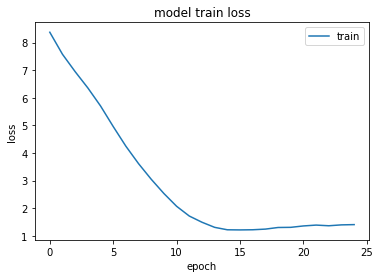

In [20]:
pyplot.plot(history.history['loss'])
pyplot.title('model train loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train'], loc='upper right')
pyplot.show()

In [21]:
# If model folder is not created, create a model folder
# and save the model and weights
if not os.path.exists("./model/"):
    os.mkdir("./model/")
model.save('./model/model.h5');
model.save_weights("./model/weights.h5")

## Step3. Generate Music

In [22]:
from keras.models import load_model

In [23]:
# Load model
model = load_model("./model/model.h5")
model.load_weights("./model/weights.h5")

In [24]:
# Open and read the text 
f = open('./miditext/original/1.txt', 'r')
music_as_chunks = []
for elm in f:
    music_as_chunks.append(elm.rstrip("\n"))
f.close()
resolution = int(music_as_chunks[0][3:])
print(resolution)
music_as_chunks = music_as_chunks[1:]

print(music_as_chunks)

384
['0_st_117_512820', '1_cc_0_0_0', '0_cc_1_0_0', '0_cc_2_0_0', '0_cc_3_0_0', '0_cc_4_0_0', '0_cc_5_0_0', '0_cc_6_0_0', '0_cc_7_0_0', '0_cc_8_0_0', '0_cc_9_0_127', '0_cc_10_0_0', '0_cc_11_0_0', '0_cc_12_0_0', '0_cc_13_0_0', '0_cc_14_0_0', '0_cc_15_0_0', '1_cc_0_32_0', '0_cc_1_32_0', '0_cc_2_32_0', '0_cc_3_32_0', '0_cc_4_32_0', '0_cc_5_32_0', '0_cc_6_32_0', '0_cc_7_32_0', '0_cc_8_32_0', '0_cc_9_32_0', '0_cc_10_32_0', '0_cc_11_32_0', '0_cc_12_32_0', '0_cc_13_32_0', '0_cc_14_32_0', '0_cc_15_32_0', '1_cc_0_7_100', '0_cc_1_7_100', '0_cc_2_7_100', '0_cc_3_7_100', '0_cc_4_7_100', '0_cc_5_7_100', '0_cc_6_7_100', '0_cc_7_7_100', '0_cc_8_7_100', '0_cc_9_7_100', '0_cc_10_7_100', '0_cc_11_7_100', '0_cc_12_7_100', '0_cc_13_7_100', '0_cc_14_7_100', '0_cc_15_7_100', '111_cc_0_64_15', '112_cc_0_64_31', '112_cc_0_64_46', '111_cc_0_64_63', '112_cc_0_64_77', '112_cc_0_64_94', '111_cc_0_64_108', '112_cc_0_64_127', '232_no_78_55', '2234_no_77_39', '150_noff_78_36', '483_no_78_45', '99_noff_77_32', '382_n

In [25]:
unique_chunks = sorted(list(set(music_as_chunks)))
chunk_indices = dict((c, i) for i, c in enumerate(unique_chunks))
indices_chunk = dict((i, c) for i, c in enumerate(unique_chunks))

print(unique_chunks)
print(chunk_indices)

['0_cc_0_64_0', '0_cc_0_64_100', '0_cc_0_64_102', '0_cc_0_64_103', '0_cc_0_64_104', '0_cc_0_64_105', '0_cc_0_64_110', '0_cc_0_64_112', '0_cc_0_64_114', '0_cc_0_64_118', '0_cc_0_64_127', '0_cc_0_64_16', '0_cc_0_64_27', '0_cc_0_64_39', '0_cc_0_64_46', '0_cc_0_64_47', '0_cc_0_64_51', '0_cc_0_64_58', '0_cc_0_64_61', '0_cc_0_64_62', '0_cc_0_64_64', '0_cc_0_64_65', '0_cc_0_64_67', '0_cc_0_64_68', '0_cc_0_64_69', '0_cc_0_64_71', '0_cc_0_64_72', '0_cc_0_64_73', '0_cc_0_64_74', '0_cc_0_64_75', '0_cc_0_64_76', '0_cc_0_64_77', '0_cc_0_64_78', '0_cc_0_64_79', '0_cc_0_64_80', '0_cc_0_64_81', '0_cc_0_64_84', '0_cc_0_64_85', '0_cc_0_64_86', '0_cc_0_64_87', '0_cc_0_64_89', '0_cc_0_64_90', '0_cc_0_64_91', '0_cc_0_64_92', '0_cc_0_64_94', '0_cc_0_64_95', '0_cc_0_64_97', '0_cc_0_64_99', '0_cc_0_67_0', '0_cc_0_67_10', '0_cc_0_67_100', '0_cc_0_67_101', '0_cc_0_67_102', '0_cc_0_67_103', '0_cc_0_67_104', '0_cc_0_67_105', '0_cc_0_67_106', '0_cc_0_67_107', '0_cc_0_67_108', '0_cc_0_67_109', '0_cc_0_67_11', '0_cc

In [26]:
maxlen = 15
start_index = random.randint(0, len(music_as_chunks) - maxlen - 1)

In [27]:
# 
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [28]:
sampled_chunks = random.sample(music_as_chunks, maxlen)
generated =  []
part_of_song = music_as_chunks[0: maxlen]
generated.extend(part_of_song)

print(sampled_chunks)

['2_no_29_57', '14_cc_0_64_82', '15_cc_0_64_59', '15_cc_0_64_61', '0_no_44_38', '15_cc_0_64_55', '12_noff_59_49', '7_cc_0_64_54', '0_cc_0_67_0', '15_cc_0_64_73', '25_no_75_47', '6_noff_73_57', '52_cc_0_64_83', '15_cc_0_64_58', '6_no_63_86']


In [29]:
print(part_of_song)

['0_st_117_512820', '1_cc_0_0_0', '0_cc_1_0_0', '0_cc_2_0_0', '0_cc_3_0_0', '0_cc_4_0_0', '0_cc_5_0_0', '0_cc_6_0_0', '0_cc_7_0_0', '0_cc_8_0_0', '0_cc_9_0_127', '0_cc_10_0_0', '0_cc_11_0_0', '0_cc_12_0_0', '0_cc_13_0_0']


In [30]:
print(generated)

['0_st_117_512820', '1_cc_0_0_0', '0_cc_1_0_0', '0_cc_2_0_0', '0_cc_3_0_0', '0_cc_4_0_0', '0_cc_5_0_0', '0_cc_6_0_0', '0_cc_7_0_0', '0_cc_8_0_0', '0_cc_9_0_127', '0_cc_10_0_0', '0_cc_11_0_0', '0_cc_12_0_0', '0_cc_13_0_0']


In [31]:
chunk_length = 1000
for i in range(chunk_length):
    x = np.zeros((1, maxlen, len(unique_chunks)))
    for t, chunk in enumerate(part_of_song):
        x[0, t, chunk_indices[chunk]] = 1.

    preds = model.predict(x, verbose=0)[0]
    distributions = [0.2,  0.6, 1.0, 1.4]
    weight = [0.3, 0.5, 0.1, 0.1]
    distribution = np.random.choice(distributions, p=weight)
    next_index = sample(preds, distribution)
    next_char = indices_chunk[next_index]

    generated.extend([next_char])
    part_of_song = part_of_song[1:]
    part_of_song.extend([next_char])
print()

In [32]:

# Create midi folder and put the generated midi into that folder
if not os.path.exists("./midi/"):
    os.mkdir("./midi/")
    os.mkdir("./midi/generated/")
elif not os.path.exists("./midi/generated/"):
    os.mkdir("./midi/generated")
file = "./midi/generated/generated1.mid"

In [33]:
# Write midi file into the generated
pattern = midi.Pattern(resolution=resolution)

track = midi.Track()
pattern.append(track)

for chunk in generated:
    chunk_info = chunk.split("_")
    event_type = chunk_info[1]

    if event_type == "no":
        tick = int(chunk_info[0])
        pitch = int(chunk_info[2])
        velocity = int(chunk_info[3])

        e = midi.NoteOnEvent(tick=tick, channel=0, velocity=velocity, pitch=pitch)
        track.append(e)
        
    elif event_type == "noff":
        tick = int(chunk_info[0])
        pitch = int(chunk_info[2])
        velocity = int(chunk_info[3])

        e = midi.NoteOffEvent(tick=tick, channel=0, velocity=velocity, pitch=pitch)
        track.append(e)

    elif event_type == "st":
        tick = int(chunk_info[0])
        bpm = int(chunk_info[2])
        mpqn = int(chunk_info[3])
        ev = midi.SetTempoEvent(tick=tick, bpm=bpm, mpqn=mpqn)
        track.append(ev)

    elif event_type == "cc":
        control = int(chunk_info[3])
        value = int(chunk_info[4])
        e = midi.ControlChangeEvent(channel=0, control=control, value=value)
        track.append(e)

end_event = midi.EndOfTrackEvent(tick=1)
track.append(end_event)

midi.write_midifile(file, pattern)

In [46]:
# output the generated midi file info 

displayGenerated = midi.read_midifile("./midi/generated/generated1.mid")
print(displayGenerated)

midi.Pattern(format=1, resolution=384, tracks=\
[midi.Track(\
  [midi.SetTempoEvent(tick=0, data=[7, 211, 52]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[0, 0]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[0, 0]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[0, 0]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[0, 0]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[0, 0]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[0, 0]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[0, 0]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[0, 0]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[0, 0]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[0, 127]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[0, 0]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[0, 0]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[0, 0]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[0, 0]),
   midi.ControlChangeEvent(tick=0, channel=0, 

In [60]:
# Play the generated music
import pygame

def play_music(music_file):
    """
    stream music with mixer.music module in blocking manner
    this will stream the sound from disk while playing
    """
    clock = pygame.time.Clock()
    try:
        pygame.mixer.music.load(music_file)
        print("Music file %s loaded!" % music_file)
    except pygame.error:
        print("File %s not found! (%s)" % (music_file, pygame.get_error()))
        return
    pygame.mixer.music.play()
    while pygame.mixer.music.get_busy():
        # check if playback has finished
        clock.tick(30)
# pick a midi music file you have ...
# (if not in working folder use full path)

midi_file = './midi/generated/generated1.mid'
play_music(midi_file)

Music file ./midi/generated/generated1.mid loaded!
